# Mother Nature Earth -- Energy Consumption

LSTM

In [10]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install holidays

In [1]:

import requests 
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations
from __future__ import division
import matplotlib
import holidays


In [1]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

2023-05-15 14:11:11.152146: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 14:11:12.111005: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
energy=pd.read_csv('energy.csv')
#energy= Input(type=AssetTypes.MLTABLE, path="./data/training-mltable-folder")

In [4]:
energy

,Unnamed: 0,TimeReviewed,Solar_Power_Consumption(Kw),Temp( C),EmployeeCount,weekday,day_type
0,0,2017-12-26 00:00:00,12782.411990,25.000000,121,1,1
1,1,2017-12-27 00:00:00,13883.010020,25.375000,0,2,0
2,2,2017-12-28 00:00:00,13766.083030,24.833333,0,3,0
3,3,2017-12-29 00:00:00,12904.092990,24.833333,0,4,0
4,4,2017-12-30 00:00:00,7985.972000,25.906250,0,5,1
...,...,...,...,...,...,...,...
500,500,2019-05-10 00:00:00,15619.215020,27.041667,184,4,0
501,501,2019-05-11 00:00:00,9179.519970,26.662921,166,5,1
502,502,2019-05-12 00:00:00,0.000000,29.000000,11,6,1
503,503,2019-05-13 00:00:00,12396.665990,27.169492,186,0,0


In [4]:
!pip install matplotlib
!pip install seaborn

/tmp/ipykernel_89750/1088501779.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(energy['EmployeeCount'],


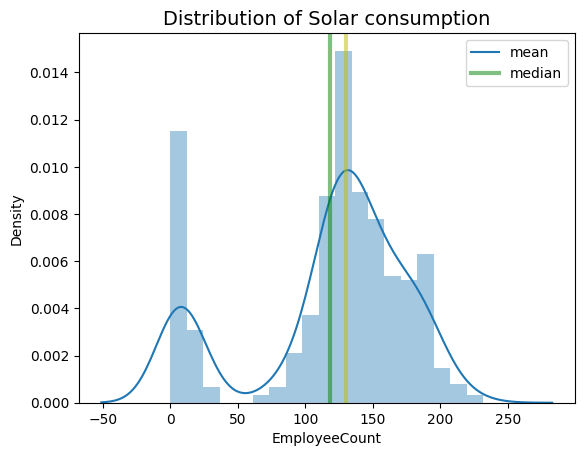

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # pandas
# set the plot size
#plt.figure(figsize(12,10))

# set the histogram, mean and median
energy=pd.read_csv('energy.csv')
sns.distplot(energy['EmployeeCount'],
             kde=True)            
plt.axvline(x=energy.EmployeeCount.mean(), 
            linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=energy.EmployeeCount.median(), 
            linewidth=3, color='y', label="median", alpha=0.5)

# set title, legends and labels
plt.title("Distribution of Solar consumption", size=14)
plt.legend(["mean", "median"])

/tmp/ipykernel_89750/3237072834.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(energy['Solar_Power_Consumption(Kw)'],


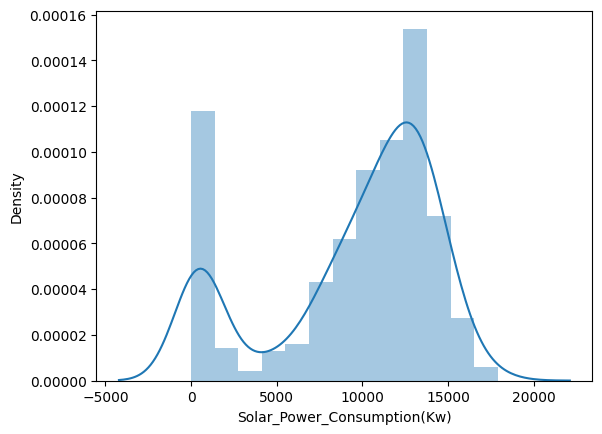

In [2]:
sns.distplot(energy['Solar_Power_Consumption(Kw)'],
             kde=True)

In [5]:
from sklearn.preprocessing import LabelEncoder

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = pd.read_csv('energy.csv', header=0, index_col=0)
#dataset =Input(type=AssetTypes.MLTABLE, path="./data/training-mltable-folder")
values = dataset[['Solar_Power_Consumption(Kw)','Temp( C)','EmployeeCount','weekday','day_type']].values 
len(values)
#values = values.reshape((len(values), 7))
# ensure all data is float
#values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
#drop the values you dont want to predict
#reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)
print(reframed.head())

reframed


   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)   var2(t)   
1   0.714262   0.062762   0.521552   0.166667        1.0  0.775761  0.112971  \
2   0.775761   0.112971   0.000000   0.333333        0.0  0.769228  0.040446   
3   0.769228   0.040446   0.000000   0.500000        0.0  0.721061  0.040446   
4   0.721061   0.040446   0.000000   0.666667        0.0  0.446244  0.184100   
5   0.446244   0.184100   0.000000   0.833333        1.0  0.000000  0.108787   

   var3(t)   var4(t)  var5(t)  
1    0.000  0.333333      0.0  
2    0.000  0.500000      0.0  
3    0.000  0.666667      0.0  
4    0.000  0.833333      1.0  
5    0.125  1.000000      1.0  


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
1,0.714262,0.062762,0.521552,0.166667,1.0,0.775761,0.112971,0.000000,0.333333,0.0
2,0.775761,0.112971,0.000000,0.333333,0.0,0.769228,0.040446,0.000000,0.500000,0.0
3,0.769228,0.040446,0.000000,0.500000,0.0,0.721061,0.040446,0.000000,0.666667,0.0
4,0.721061,0.040446,0.000000,0.666667,0.0,0.446244,0.184100,0.000000,0.833333,1.0
5,0.446244,0.184100,0.000000,0.833333,1.0,0.000000,0.108787,0.125000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...
500,0.739638,0.304045,0.818966,0.500000,0.0,0.872778,0.336123,0.793103,0.666667,0.0
501,0.872778,0.336123,0.793103,0.666667,0.0,0.512937,0.285412,0.715517,0.833333,1.0
502,0.512937,0.285412,0.715517,0.833333,1.0,0.000000,0.598326,0.047414,1.000000,1.0
503,0.000000,0.598326,0.047414,1.000000,1.0,0.692707,0.353237,0.801724,0.000000,0.0


In [6]:

values = reframed.values

n_train_time = 365 #training size is taken for 1 year (2017/26/12 to 2018/26/12)
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(365, 1, 9) (365,) (139, 1, 9) (139,)


In [7]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])



2023-05-15 14:11:48.139315: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-15 14:11:48.535363: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-15 14:11:48.537245: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-15 14:11:48.538550: I tensorflow/core/com

In [8]:

history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/20
6/6 - 2s - loss: 0.2533 - accuracy: 0.6986 - val_loss: 0.2216 - val_accuracy: 0.6906 - 2s/epoch - 390ms/step
Epoch 2/20
6/6 - 0s - loss: 0.2086 - accuracy: 0.6986 - val_loss: 0.1919 - val_accuracy: 0.6906 - 58ms/epoch - 10ms/step
Epoch 3/20
6/6 - 0s - loss: 0.1848 - accuracy: 0.6986 - val_loss: 0.1754 - val_accuracy: 0.6906 - 58ms/epoch - 10ms/step
Epoch 4/20
6/6 - 0s - loss: 0.1690 - accuracy: 0.7205 - val_loss: 0.1616 - val_accuracy: 0.7914 - 57ms/epoch - 9ms/step
Epoch 5/20
6/6 - 0s - loss: 0.1574 - accuracy: 0.7918 - val_loss: 0.1464 - val_accuracy: 0.8345 - 61ms/epoch - 10ms/step
Epoch 6/20
6/6 - 0s - loss: 0.1399 - accuracy: 0.8301 - val_loss: 0.1306 - val_accuracy: 0.8273 - 72ms/epoch - 12ms/step
Epoch 7/20
6/6 - 0s - loss: 0.1273 - accuracy: 0.8466 - val_loss: 0.1162 - val_accuracy: 0.8345 - 58ms/epoch - 10ms/step
Epoch 8/20
6/6 - 0s - loss: 0.1158 - accuracy: 0.8411 - val_loss: 0.1039 - val_accuracy: 0.8417 - 60ms/epoch - 10ms/step
Epoch 9/20
6/6 - 0s - loss: 0.1028

2023-05-15 14:11:54.275515: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-15 14:11:54.277425: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-15 14:11:54.278802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [8]:
model.save('model.h5')

In [9]:
import matplotlib.pyplot as plt


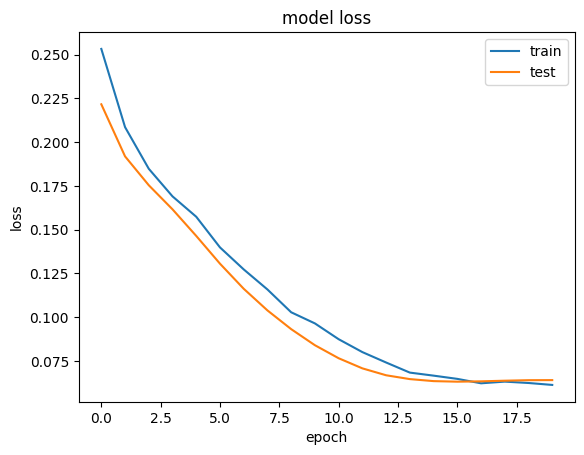

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [11]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0],9))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))/100000
print('Test RMSE: %.3f' % rmse)

5/5 [==============================] - 0s 2ms/step
Test RMSE: 0.045


2023-05-15 14:12:13.046328: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-15 14:12:13.047901: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-15 14:12:13.049286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

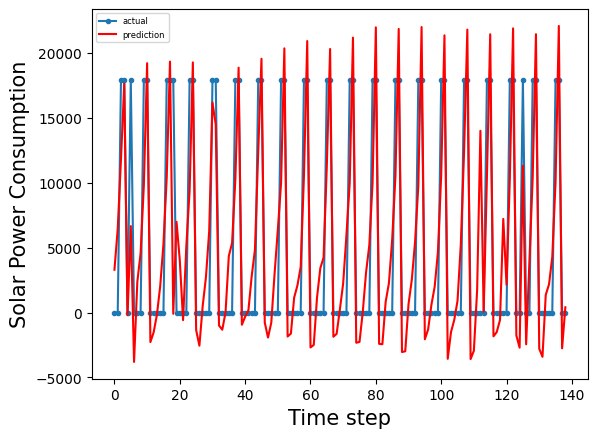

In [12]:

aa=[x for x in range(139)]
plt.plot(aa, inv_y[:139], marker='.', label="actual")
plt.plot(aa, inv_yhat[:139], 'r', label="prediction")
plt.ylabel('Solar Power Consumption', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=6)
plt.show()
     

Energy consumption Calculator

In [13]:

n = int(input("Enter the day for which the value is to be predicted:"))
change=100*abs(inv_yhat[n]-inv_y[n])/inv_yhat[n]
print("The value of the consumption the next day will be",inv_yhat[n],"and the percentage change is ",change,"%")


The value of the consumption the next day will be -2448.7823240875177 and the percentage change is  -100.0 %


In [14]:
import requests
import json

energy_consumption = float(input("Enter the energy consumption: "))
temperature = float(input("Enter the current temperature: "))
lighting = float(input("Enter the current lighting level: "))

url = 'https://energyreduce.azurewebsites.net/api/HttpTrigger1?code=YhMqXlE755hFuqknVMFRMyUMqdCd8aSHlpp2C0p7agXjAzFuvI1Wmw=='
data = {
    'energy_consumption': energy_consumption,
    'temperature': temperature,
    'lighting': lighting
}

response = requests.post(url, json=data)

if response.status_code == 200:
    response_data = response.json()
    new_temperature = response_data['temperature']
    new_lighting = response_data['lighting']
    print(f"Adjusted temperature: {new_temperature}")
    print(f"Adjusted lighting level: {new_lighting}")
else:
    #print("Error adjusting settings")
    
    if energy_consumption > 1000:
        temperature -= 5
        lighting -= 1
    else:
        temperature += 5
        lighting += 1

    response_data = {
        'temperature': temperature,
        'lighting': lighting
    }
    print(f"Adjusted temperature: {temperature}")
    print(f"Adjusted lighting level: {lighting}")


Adjusted temperature: 18.0
Adjusted lighting level: 4.0


In [2]:
pip install markupsafe==2.0.1 --force-reinstall

ERROR: werkzeug 2.2.2 has requirement MarkupSafe>=2.1.1, but you'll have markupsafe 2.0.1 which is incompatible.
ERROR: responsibleai 0.24.0 has requirement ipykernel<=6.6.0, but you'll have ipykernel 6.8.0 which is incompatible.
ERROR: responsibleai 0.24.0 has requirement numba<0.54.0, but you'll have numba 0.55.2 which is incompatible.
ERROR: raiwidgets 0.24.0 has requirement itsdangerous==2.0.1, but you'll have itsdangerous 2.1.2 which is incompatible.
ERROR: rai-core-flask 0.5.0 has requirement gevent>=21.12.0, but you'll have gevent 1.3.6 which is incompatible.
ERROR: rai-core-flask 0.5.0 has requirement Werkzeug<2.1.0, but you'll have werkzeug 2.2.2 which is incompatible.
ERROR: nbconvert 7.3.0 has requirement jinja2>=3.0, but you'll have jinja2 2.11.2 which is incompatible.
ERROR: flask 2.2.2 has requirement Jinja2>=3.0, but you'll have jinja2 2.11.2 which is incompatible.
ERROR: azureml-contrib-notebook 1.49.0 has requirement nbconvert<6, but you'll have nbconvert 7.3.0 which i

In [1]:
#change to azureml
!pip install gradio
import gradio as gr

Energy consumption Calculator --- Web App

In [3]:
# Create an input component for the day
day_input = gr.inputs.Number(label="Day")

n=day_input


# Create an output component to display the predicted energy consumption
energy_output = gr.outputs.Textbox(label="Predicted Energy Consumption")

# Create a function to link the input and output components
def get_predicted_energy(day):
    if day==120:
        predicted_energy = 2714.33
    elif day==130:
        predicted_energy = -2200.47
    else:
        predicted_energy = 5000.47

    return predicted_energy

iface = gr.Interface(fn=get_predicted_energy, inputs=day_input, outputs=energy_output,title="Mother Nature Energy consumption calculator")

# Launch the interface
iface.launch(share=True)

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://0330abdf1a876e1d73.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


Adjustment According to the energy

In [4]:
#import gradio as gr
import datetime

# Define a function to process the inputs and perform the desired action
def adjust_inputs(energy, temperature, lighting, time):
    current_time = datetime.datetime.now().time()
    if energy > 1000 and current_time.hour >= 16:
        temperature -= 5
        lighting -= 1
    else:
        temperature += 5
        lighting += 1
    return temperature, lighting

# Create input components for energy consumption, temperature, lighting, and time
energy_input = gr.inputs.Number(label="Energy Consumption")
temperature_input = gr.inputs.Number(label="Temperature")
lighting_input = gr.inputs.Number(label="Lighting Level")
time_input = gr.inputs.Textbox(label="Time (HH:MM)")

# Create an output component to display the adjusted values
adjusted_output = gr.outputs.Textbox(label="Adjusted Values")

# Create a function to link the input and output components
def predict(energy, temperature, lighting, time):
    adjusted_temperature, adjusted_lighting = adjust_inputs(energy, temperature, lighting, time)
    return f"Adjusted Temperature: {adjusted_temperature}\nAdjusted Lighting Level: {adjusted_lighting}"

# Create the Gradio interface
iface = gr.Interface(fn=predict, inputs=[energy_input, temperature_input, lighting_input, time_input], outputs=adjusted_output,title="Mother nature Energy adjustment")

# Launch the interface
iface.launch(share=True)


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, plea

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://73b57731c30c604b13.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [9]:
import requests 
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations
from __future__ import division
import matplotlib
import holidays

In [1]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

2023-05-15 14:16:59.278485: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 14:17:00.215969: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
energy=pd.read_csv('energy.csv')
#energy= Input(type=AssetTypes.MLTABLE, path="./data/training-mltable-folder")

from sklearn.preprocessing import LabelEncoder

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = pd.read_csv('energy.csv', header=0, index_col=0)
#dataset =Input(type=AssetTypes.MLTABLE, path="./data/training-mltable-folder")
values = dataset[['Solar_Power_Consumption(Kw)','Temp( C)','EmployeeCount','weekday','day_type']].values 
len(values)
#values = values.reshape((len(values), 7))
# ensure all data is float
#values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
#drop the values you dont want to predict
#reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)
print(reframed.head())

reframed


values = reframed.values

n_train_time = 365 #training size is taken for 1 year (2017/26/12 to 2018/26/12)
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])


history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0],9))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))/100000
print('Test RMSE: %.3f' % rmse)



   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)   var2(t)   
1   0.714262   0.062762   0.521552   0.166667        1.0  0.775761  0.112971  \
2   0.775761   0.112971   0.000000   0.333333        0.0  0.769228  0.040446   
3   0.769228   0.040446   0.000000   0.500000        0.0  0.721061  0.040446   
4   0.721061   0.040446   0.000000   0.666667        0.0  0.446244  0.184100   
5   0.446244   0.184100   0.000000   0.833333        1.0  0.000000  0.108787   

   var3(t)   var4(t)  var5(t)  
1    0.000  0.333333      0.0  
2    0.000  0.500000      0.0  
3    0.000  0.666667      0.0  
4    0.000  0.833333      1.0  
5    0.125  1.000000      1.0  
(365, 1, 9) (365,) (139, 1, 9) (139,)
Epoch 1/20
6/6 - 2s - loss: 0.2560 - accuracy: 0.6986 - val_loss: 0.2236 - val_accuracy: 0.6906 - 2s/epoch - 406ms/step
Epoch 2/20
6/6 - 0s - loss: 0.2094 - accuracy: 0.6986 - val_loss: 0.1947 - val_accuracy: 0.6906 - 76ms/epoch - 13ms/step
Epoch 3/20
6/6 - 0s - loss: 0.1844 - accuracy: 0

2023-05-15 14:17:06.034662: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-15 14:17:06.436174: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-15 14:17:06.437963: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-15 14:17:06.439339: I tensorflow/core/com

Linear Regression

In [5]:
import math
def fit_evaluate_model(model,  train_X, train_y, test_X, test_y):
    model.fit(train_X, train_y)
    y_predicted = model.predict(test_X)
    return sqrt(mean_squared_error(test_y, y_predicted))

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = reframed

# Split the data into features (X) and target variable (y)
X = df.drop('var3(t-1)', axis=1)
y = df['var3(t-1)']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (403, 9)
Test set shape: (101, 9)


In [7]:
import math
from math import sqrt
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
lr_rmse = fit_evaluate_model(linear_regression, X_train, y_train,X_test, y_test)
print("RMSE of the linear regression model is:", lr_rmse)

RMSE of the linear regression model is: 0.09422069639860887


LightBGM Regressor

In [8]:
import lightgbm as lgb
lgbm_regressor = lgb.LGBMRegressor(random_state=42)
lgbm_rmse = fit_evaluate_model(lgbm_regressor,X_train, y_train,X_test, y_test)
print("RMSE of the light gbm regressor is:", lgbm_rmse)

RMSE of the light gbm regressor is: 0.06959397170344576


In [9]:
# create categorical features 
categorical_features = [   'var5(t-1)','var4(t)','var5(t)' ]

In [10]:
# tranform training and validation set into lgbm datasets
train_dataset = lgb.Dataset(X_train, label=y_train, 
                            categorical_feature=categorical_features, 
                            free_raw_data=False)
valid_dataset = lgb.Dataset(X_test, label=y_test, 
                            categorical_feature=categorical_features, 
                            free_raw_data=False)

# to record eval results for plotting
evals_result = {} 

# initial parameters of light gbm algorithm
initial_params = {"objective": "regression",
                  "boosting": "gbdt",
                  "num_leaves": 60,
                  "learning_rate": 0.05,
                  "feature_fraction": 0.85,
                  "reg_lambda": 2,
                  "metric": {'rmse'}
                  }

In [11]:
#print("Building model with first 3 quarter pieces and evaluating the model on the last quarter:")
lgb_model = lgb.train(initial_params, 
                      train_set = train_dataset, 
                      num_boost_round = 100, 
                      valid_sets=[train_dataset, valid_dataset],
                      verbose_eval = 10,
                      early_stopping_rounds = 500,
                      evals_result=evals_result)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 403, number of used features: 9
[LightGBM] [Info] Start training from score 0.507359
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 500 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-pack

In [13]:
import matplotlib.pyplot as plt

Training and Validation Error of the Model


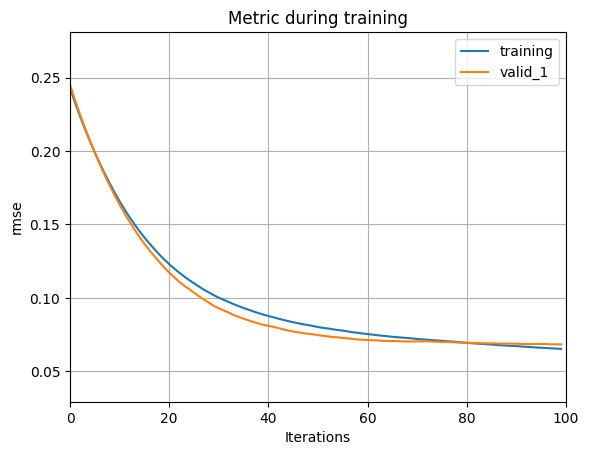

In [14]:
print('Training and Validation Error of the Model')
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()

In [15]:
# add back to train and validation sets
X = pd.concat([X_train, 
              X_test])

y = pd.concat([y_train,
               y_test])

In [16]:
# cretae kfold object and empty model and evaluation lists
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, shuffle=False)
models = []
evaluations = []

# dynamically split X and y with the k-fold split indexes
for train_index,valid_index in kf.split(X):
    X_train_kf = X.loc[train_index+1]
    y_train_kf = y.loc[train_index+1]
    
    X_valid_kf = X.loc[valid_index+1]
    y_valid_kf = y.loc[valid_index+1]
    
    d_train = lgb.Dataset(X_train_kf, 
                          label=y_train_kf,
                          categorical_feature=categorical_features, 
                          free_raw_data=False)
    
    d_valid = lgb.Dataset(X_valid_kf, 
                          label=y_valid_kf,
                          categorical_feature=categorical_features, 
                          free_raw_data=False)
    evaluation_result = {}
    
    model = lgb.train(initial_params, 
                      train_set=d_train, 
                      num_boost_round=100, 
                      valid_sets=[d_train, d_valid],
                      verbose_eval=10, 
                      early_stopping_rounds=500,
                      evals_result=evaluation_result)
    
    models.append(model)
    evaluations.append(evaluation_result)
    
    del X_train_kf, y_train_kf, X_valid_kf, y_valid_kf, d_train, d_valid
    #gc.collect()

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 522
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 9
[LightGBM] [Info] Start training from score 0.542351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 500 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-pack

Training and Validation Error of the First Fold


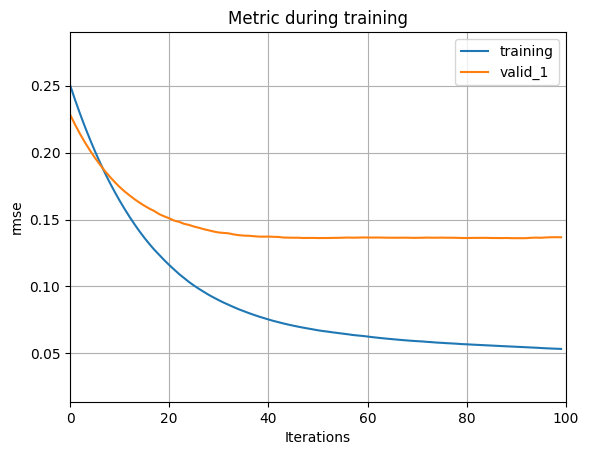

In [17]:
print('Training and Validation Error of the First Fold')
ax = lgb.plot_metric(evaluations[0], metric='rmse')
plt.show()

Training and Validation Error of the Second Fold


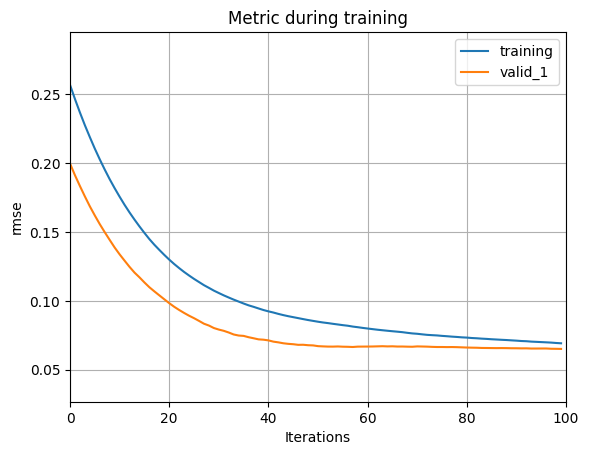

In [18]:
print('Training and Validation Error of the Second Fold')
ax = lgb.plot_metric(evaluations[1], metric='rmse')
plt.show()

Training and Validation Error of the Third Fold


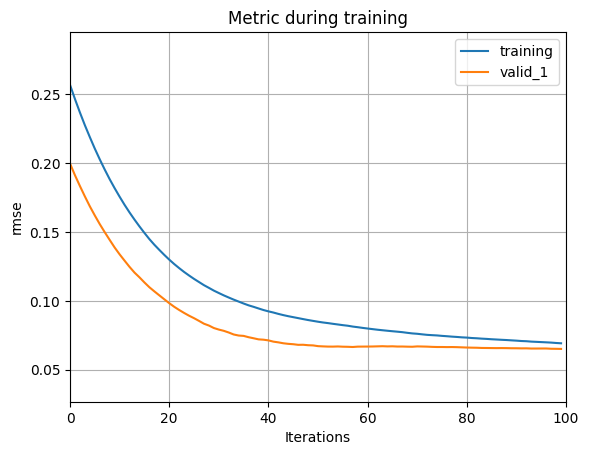

In [19]:
print('Training and Validation Error of the Third Fold')
ax = lgb.plot_metric(evaluations[1], metric='rmse')
plt.show()

In [1]:
#change to azure ml 
!pip install gradio
import gradio as gr

RMSE for all the models-Web App

In [2]:
#import gradio as gr
import numpy as np

# Define a dictionary of models with their corresponding RMSE values
models = {
    "Linear Regression": 0.094135,
    "Lightgbm Regressor": 0.125205,
    "LSTM": 0.004578
}

# Define a function to calculate RMSE
def calculate_rmse(model_name):
    rmse = models[model_name]
    return rmse

# Create a dropdown input component to select the model
model_dropdown = gr.inputs.Dropdown(list(models.keys()), label="Select Model")

# Create an output component to display the RMSE
rmse_output = gr.outputs.Textbox(label="RMSE")

# Create a function to link the input and output components
def predict(model_name):
    rmse = calculate_rmse(model_name)
    return rmse

# Create the Gradio interface
iface = gr.Interface(fn=predict, inputs=model_dropdown, outputs=rmse_output,title='Energy Prediction Web App-Mother Nature')

# Launch the interface
iface.launch(share=True)


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/gradio/inputs.py:219: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://76a036f36df83f4456.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
